# Lesson Outline
- Brief Intro to Reinforcement Learning
- What is Gymnasium
- Frozen Lake Challenge
- Q Learning
- The Exploration and Exploitation Dilemma
- Extra (Deep Reinforcement Learning)



### Reinforcement Learning Core Concepts
- Agents, Policy, Environment, Actions
- Bellman Equation. Discount Factors and Rewards
- Stochastic Processes vs Determistic Processes
- Tabular Reinforcement Learning

<div style="text-align: center;">
  <img src="images/Basic_reinforcement_learning_cycle.png" alt="Reinfocement_learning cycle" title="Reinforcement learning" width="600" height="400" />
</div>


- To clone this repo git clone https://github.com/sokistar24/7088_cem_rl.git

### Some terminologies 
- A **state 's'** is a complete description of the enviroment the agent is in. There is no information about the environment  hiddent from the agent
- Example a robot in a factory every thing withing the factory is the state
- An **observation 'o'** is a partial description of the environment which omits some information of the environment
- Example what the sensors of the robot senses withing the factory
- **Policy** is a rule of system of rules used by an agent to decide what actions to take next based on the observations and reward received from the environment.

### Bellman Equation
$$
V(s) = \max_a \left( R(s,a) + \gamma  V(s') \right)
$$

- **Reward** is a feedback signal given to an agent after it performs and action in a particular state
- **Discount factor** is used to determine the present value of future rewards


# Installation Dependencies
- To run the code you need to have the follwing dependces installed
- numpy, matplotlib, pytorch, swig
- the swig allows the for the installation of wrappers for rendering our agents
- the visualization would only work on anocoda and other disctribution and may not work on google colab
- next  install gymnasium[toy-text]


In [2]:
!pip install numpy matplotlib torch swig


In [3]:
!pip install gymnasium[toy-text]

  Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires absl-py>=1.0.0, which is not installed.
tensorflow-intel 2.12.0 requires astunparse>=1.6.0, which is not installed.
tensorflow-intel 2.12.0 requires flatbuffers>=2.0, which is not installed.
tensorflow-intel 2.12.0 requires gast<=0.4.0,>=0.2.1, which is not installed.
tensorflow-intel 2.12.0 requires google-pasta>=0.1.1, which is not installed.
tensorflow-intel 2.12.0 requires libclang>=13.0.0, which is not installed.
tensorflow-intel 2.12.0 requires opt-einsum>=2.3.2, which is not installed.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, which is not installed.
tensorflow-intel 2.12.0 requires tensorflow-io-gcs-filesystem>=0.23.1; platform_machine != "arm64" or platform_system != "Darwin", which is not installed.
tensorflow-intel 2.12.0 requires termcolor>=1.

In [5]:
# Importing libraries
# https://gymnasium.farama.org/
import numpy as np 
import gymnasium as gym
import  matplotlib.pyplot as plt
import time

### Introduction to the gymnasium environment 
- Click on the link to the official gymnasium documentation
- https://gymnasium.farama.org/


In [25]:
env = gym.make("MountainCar-v0",render_mode='human')

In [26]:
observation,info = env.reset(seed=42) # Reset all internal values

for step in range (100) :
    
    # 0 < ---- 
    # 1 stays put 
    # 2 ---->
    
    env.render()
    action = 2 
    observation, reward, terminated, truncated, info = env.step(action)
    print(f' Position : {observation[0]}')
    print(f' Velocity : {observation[1]}')
    
    time.sleep(0.1)
    

env.close()

 Position : -0.444791316986084
 Velocity : 0.00041747934301383793
 Position : -0.44395938515663147
 Velocity : 0.0008319141925312579
 Position : -0.44271910190582275
 Velocity : 0.001240285113453865
 Position : -0.4410794973373413
 Velocity : 0.001639622263610363
 Position : -0.4390524625778198
 Velocity : 0.002027029637247324
 Position : -0.4366527497768402
 Velocity : 0.0023997093085199594
 Position : -0.4338977634906769
 Velocity : 0.0027549834921956062
 Position : -0.4308074414730072
 Velocity : 0.00309031642973423
 Position : -0.42740410566329956
 Velocity : 0.003403334878385067
 Position : -0.42371225357055664
 Velocity : 0.003691847203299403
 Position : -0.4197584092617035
 Velocity : 0.003953860141336918
 Position : -0.41557082533836365
 Velocity : 0.004187592770904303
 Position : -0.4111793339252472
 Velocity : 0.004391491413116455
 Position : -0.40661507844924927
 Velocity : 0.004564238712191582
 Position : -0.40191033482551575
 Velocity : 0.004704760853201151
 Position : -0.

In [8]:
def simple_agent(Observation):
    
    # Observation
    position,velocity = Observation
    if -0.1 < position < 0.4:
        action = 2
        
    elif velocity < 0 and position < -0.2:
        action = 0
        
    else :
        action = 1 
        
    return action 

In [10]:
env = gym.make("MountainCar-v0",render_mode='human')
observation,info = env.reset() # Reset all internal values

for step in range (200) :
    
    # 0 < ---- 
    # 1 stays put 
    # 2 ---->
    
    env.render()
    action = simple_agent(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    print(f' Position : {observation[0]}')
    print(f' Velocity : {observation[1]}')
    
    time.sleep(0.1)
    

env.close()
    

 Position : -0.5848241448402405
 Velocity : 0.00046000423026271164
 Position : -0.5839075446128845
 Velocity : 0.0009166169329546392
 Position : -0.5825410485267639
 Velocity : 0.001366468844935298
 Position : -0.5807348489761353
 Velocity : 0.0018062358722090721
 Position : -0.5785021781921387
 Velocity : 0.0022326610051095486
 Position : -0.5758596062660217
 Velocity : 0.0026425770483911037
 Position : -0.5728266835212708
 Velocity : 0.003032929264008999
 Position : -0.5694258809089661
 Velocity : 0.0034007977228611708
 Position : -0.5656824111938477
 Velocity : 0.0037434191908687353
 Position : -0.5616242289543152
 Velocity : 0.004058208782225847
 Position : -0.5572814345359802
 Velocity : 0.004342781379818916
 Position : -0.5526864528656006
 Velocity : 0.004594971891492605
 Position : -0.5478736162185669
 Velocity : 0.004812852945178747
 Position : -0.5428788661956787
 Velocity : 0.004994753282517195
 Position : -0.5377395749092102
 Velocity : 0.005139273591339588
 Position : -0.53

# History of Q-learning
- 1940s - 1960s: Jean Piaget was a Swiss pychologists studying child development.
- 1980s : Chris watkings a graduate student at Cambridge University performed Piaget sytle learning experiment with primary school children.
- Watkins observed that after few attemps children generally improved their problem solving ability.
- Watkins applied his general findings to begin thinking of reinforcemnt learning as a form of incremental dynamic programming.
- 1989: Published his PhD Thesis "Learning from Delayed Rewards" later known as Q - learning.

#                                                                                                       <div align="center">The Frozen Lake chalenge</div>

<div style="text-align: center;">
  <img src="images/frozen_lake.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>

image source : https://medium.com/mlearning-ai/a-deep-dive-into-reinforcement-learning-q-learning-and-deep-q-learning-on-a-10x10-frozenlake-c76d56810a46
Author : Nandan Grover

In [29]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human') # Deterministic 

# <div align="center">Initializing and updating the Q-table</div>


In [30]:
env.reset(seed=42)
for step in range(50):
    
    env.render()
    action = env.action_space.sample() # 
    print(f'action is {action}')
    
    observation,reward,terminated,truncated,info = env.step(action)
    print (f'observation is {observation}')
    time.sleep(0.2)
    if terminated or truncated:
        env.reset()
env.close()


action is 1
observation is 4
action is 0
observation is 4
action is 3
observation is 0
action is 1
observation is 4
action is 1
observation is 8
action is 1
observation is 12
action is 2
observation is 1
action is 0
observation is 0
action is 0
observation is 0
action is 1
observation is 4
action is 0
observation is 4
action is 0
observation is 4
action is 1
observation is 8
action is 2
observation is 9
action is 0
observation is 8
action is 3
observation is 4
action is 1
observation is 8
action is 2
observation is 9
action is 2
observation is 10
action is 1
observation is 14
action is 3
observation is 10
action is 2
observation is 11
action is 3
observation is 0
action is 1
observation is 4
action is 2
observation is 5
action is 3
observation is 0
action is 0
observation is 0
action is 2
observation is 1
action is 3
observation is 1
action is 1
observation is 5
action is 2
observation is 1
action is 2
observation is 2
action is 1
observation is 6
action is 1
observation is 10
action i

<div style="text-align: center;">
  <img src="images/Q_table_initial.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>


In [31]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True,render_mode='human') # Stochastic

In [32]:
env.reset(seed=42)
for step in range(50):
    
    env.render()
    action = env.action_space.sample() # 
    print(f'action is {action}')
    
    observation,reward,terminated,truncated,info = env.step(action)
    print (f'observation is {observation}')
    time.sleep(0.2)
    if terminated or truncated:
        env.reset()
env.close()


action is 0
observation is 0
action is 3
observation is 0
action is 3
observation is 0
action is 2
observation is 4
action is 0
observation is 8
action is 1
observation is 9
action is 2
observation is 5
action is 3
observation is 0
action is 1
observation is 4
action is 1
observation is 5
action is 0
observation is 4
action is 1
observation is 8
action is 1
observation is 8
action is 1
observation is 12
action is 1
observation is 1
action is 0
observation is 0
action is 0
observation is 4
action is 3
observation is 0
action is 1
observation is 1
action is 3
observation is 0
action is 1
observation is 1
action is 3
observation is 2
action is 2
observation is 3
action is 0
observation is 3
action is 0
observation is 3
action is 0
observation is 7
action is 2
observation is 0
action is 2
observation is 4
action is 2
observation is 5
action is 1
observation is 0
action is 0
observation is 0
action is 2
observation is 1
action is 0
observation is 1
action is 3
observation is 0
action is 3
o

In [33]:
# initialize the Q table to zero with size of the states and actions
Q = np.zeros([env.observation_space.n,env.action_space.n])

In [34]:

print (Q)
# a numpy arrays of zeros

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


$$
Q(s_t, a_t) = R_{t+1} + 
\boxed{
\begin{array}{l}
\gamma \cdot R_{t+2} + 
\gamma^2 \cdot R_{t+3} + 
\gamma^3 \cdot R_{t+4} + 
\cdots
\end{array}
}
$$


$$
Q(s_{t+1}, a_{t+1}) = R_{t+2} + 
\boxed{
\begin{array}{l}
\gamma \cdot R_{t+3} + 
\gamma^2 \cdot R_{t+4} + 
\gamma^3 \cdot R_{t+5} + 
\cdots
\end{array}
}
$$


$$
{Q(s_t, a_t) =  \sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1}}
$$


$$
Q(s_t, a_t) = R_{t+1} + 
\boxed{
\begin{array}{l}
\gamma \cdot Q(s_{t+1}, a_{t+1})  
\end{array}
}
$$


$$
Q_{\text{target}}(s_t, a_t) = R_{t+1} + \gamma \max_{a} Q(s_{t+1}, a)
$$

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t)]
$$


$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [ 
\boxed{
\begin{array}{l}
R_{t+1} +\gamma \max_{a} Q(s_{t+1}, a)
\end{array}
}
- Q(s_t, a_t)]
$$


$$
Q_{new} \leftarrow Q_{current} +\alpha( error)
$$

$$
Q_{new} \leftarrow Q_{current} +\alpha[Q_{target}-Q_{current}]
$$

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [R_{t+1} +\gamma \max_{a} Q(s_{t+1}, a)- Q(s_t, a_t)]
$$


<div style="text-align: center;">
  <img src="images/Goal_state.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>


# Exploitation versus Exploration tradeoff

$$
a_t =
\begin{cases}
\text{argmax}_{a} Q(s_t, a), & \text{with probability } 1 - \epsilon_t \\
\text{random action}, & \text{with probability } \epsilon_t
\end{cases}
$$


In [35]:
def epsilon_greedy_action_selection(epsilon,Q,state):
    
    random_number = np.random.random()
    if random_number > epsilon:
        action = np.argmax(Q[state,:])
    else:
        action = env.action_space.sample()
    return action

$$
\epsilon_t = \epsilon_{\text{min}} + (\epsilon_{\text{max}} - \epsilon_{\text{min}}) \cdot e^{-\text{decay rate} \cdot t}
$$

In [36]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01
epoch = 20000

In [37]:
#function to reduce the exploration
def reduce_epsilon(epsilon,epoch):
    
    return min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decay_rate * epoch)

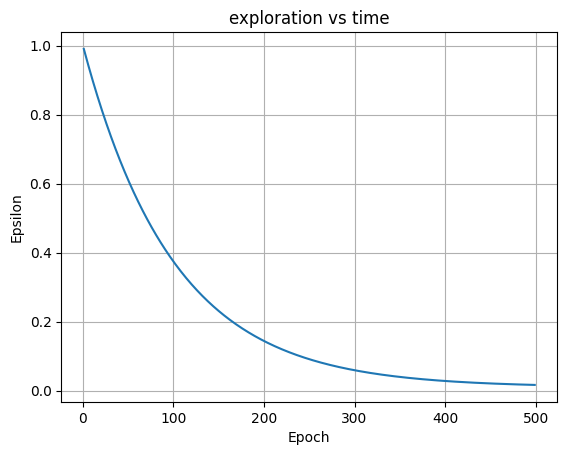

In [38]:

epochs = np.arange(1, 500)
epsilons = [reduce_epsilon(epsilon, epoch) for epoch in epochs]

plt.plot(epochs, epsilons)
plt.xlabel('Epoch')
plt.ylabel('Epsilon')
plt.title('exploration vs time')
plt.grid()
plt.show()



In [39]:
# Learning parameters
Alpha = 0.8 # Learning rate
Gamma = 0.9 # discount factor 


In [40]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

In [ ]:
# for further explanation you can click on the link to the medium article
#https://medium.com/@sokistar24/reinforcement-learning-relating-the-maths-with-code-using-frozen-lake-2b16b1d3e004

In [41]:
# Training loop
episodes = 20000
rewards = []
cum_reward=0
for episode in range(episodes):
    # initialize the environment 
    
    state,info = env.reset(seed=42)

    truncated = False
    terminated = False
    #reward = 0 # cummulative reward
        
    while not truncated or terminated:
        """
        if np.random.random()<epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])
        """
        action = epsilon_greedy_action_selection(epsilon,Q,state)
        next_state,reward,truncated,terminated,info = env.step(action)
        # calculate the Q- value
        Q[state,action] = Q[state,action] + Alpha*(reward + Gamma*np.max(Q[next_state,:])- Q[state,action])                                     
        state = next_state 
        cum_reward += reward 
        #print(reward)
        if episode%500 ==0 :
            print(f'total cumulative rewards at episode {episode} is {cum_reward}')
            #rewards.append(cum_reward)
            break
    epsilon = reduce_epsilon(epsilon,episode)
    rewards.append(cum_reward)    
    
env.close()  
np.save('Q.npy', Q)

total cumulative rewards at episode 0 is 0.0
total cumulative rewards at episode 500 is 349.0
total cumulative rewards at episode 1000 is 839.0
total cumulative rewards at episode 1500 is 1332.0
total cumulative rewards at episode 2000 is 1825.0
total cumulative rewards at episode 2500 is 2320.0
total cumulative rewards at episode 3000 is 2814.0
total cumulative rewards at episode 3500 is 3308.0
total cumulative rewards at episode 4000 is 3800.0
total cumulative rewards at episode 4500 is 4292.0
total cumulative rewards at episode 5000 is 4790.0
total cumulative rewards at episode 5500 is 5283.0
total cumulative rewards at episode 6000 is 5777.0
total cumulative rewards at episode 6500 is 6271.0
total cumulative rewards at episode 7000 is 6765.0
total cumulative rewards at episode 7500 is 7258.0
total cumulative rewards at episode 8000 is 7752.0
total cumulative rewards at episode 8500 is 8244.0
total cumulative rewards at episode 9000 is 8738.0
total cumulative rewards at episode 9500

In [42]:
# Print updated Q table
print(Q)


[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.33051065 0.38263752]
 [0.47444603 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.27505819]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.6561     0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.52488    0.         0.729     ]
 [0.6561     0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


- What does the Q in Q learning stand for?

Text(0.5, 1.0, 'reward vs episode')

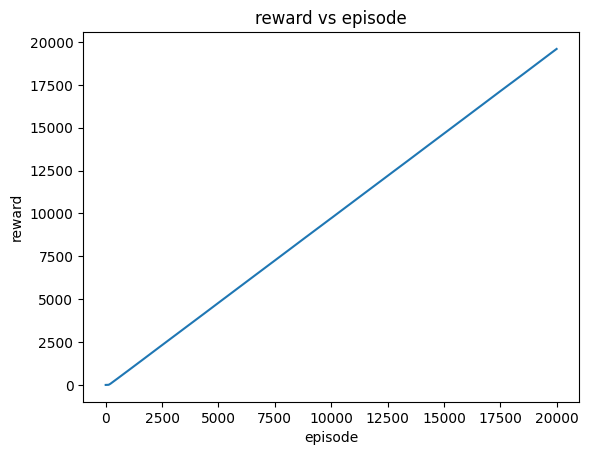

In [43]:

plt.plot(range(episodes),rewards)
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('reward vs episode')

# Visualising trained agent

In [44]:
# Reinitialize the environment 
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')

In [45]:
q_table = np.load('Q.npy')
state,info = env.reset()
reward=0
round=0
for steps in range(30):
    env.render()
    action = np.argmax(q_table[state,:])
    state,reward,truncated,terminated,info = env.step(action)
    
    time.sleep(1)    
    if truncated or terminated:
        round += 1
        print(f"reward at round: {round} is = {reward}")
        state,info = env.reset()
env.close()

reward at round: 1 is = 1.0
reward at round: 2 is = 1.0
reward at round: 3 is = 1.0
reward at round: 4 is = 1.0
reward at round: 5 is = 1.0


### TODO 
- Change the grid to 10 x 10
- Try different exploration strategy
- Try varying the learning rate and discount factor
- Make the environment stochastic

###  Explore further 
- solve the other environments from the Toy Text environments in gymasium  
- Try the Blackjack, cliff walking, Taxi
- https://gymnasium.farama.org/environments/toy_text/

In [ ]:
# solve the taxi v3 environment
env =gym.make('Taxi-v3')